<a href="https://colab.research.google.com/github/phuongnt3391/linear-regression/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('regression_data.xlsx')

#Quantitative technique

Central tendency 
Measure of speed

In [3]:
df.shape

(27, 2)

In [4]:
df.dtypes

x    float64
y    float64
dtype: object

In [5]:
df.head()

,x,y
0,1.42,1.70
1,1.86,7.80
2,1.48,2.05
3,3.14,12.30
4,2.21,9.35


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       27 non-null     float64
 1   y       27 non-null     float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [7]:
df.mean()

x    2.236667
y    6.070000
dtype: float64

In [8]:
df.median()

x    2.18
y    3.20
dtype: float64

In [9]:
df.mode()

,x,y
0,1.85,1.7
1,2.18,2.4


In [10]:
df.describe()

,x,y
count,27.000000,27.000000
mean,2.236667,6.070000
std,0.845468,4.930559
min,1.200000,1.200000
25%,1.730000,2.300000
50%,2.180000,3.200000
75%,2.520000,9.470000
max,4.600000,17.800000


#Graphical method

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


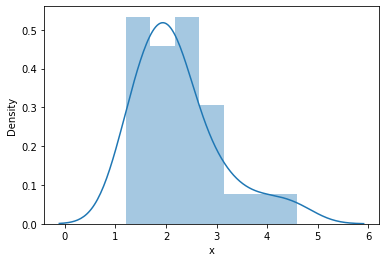

In [12]:
sns.distplot(df['x'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


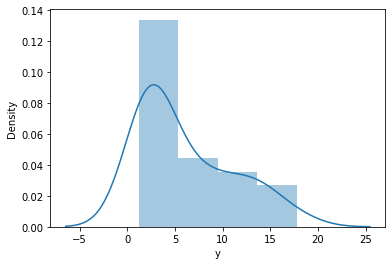

In [13]:
sns.distplot(df['y'])

Relationship plot

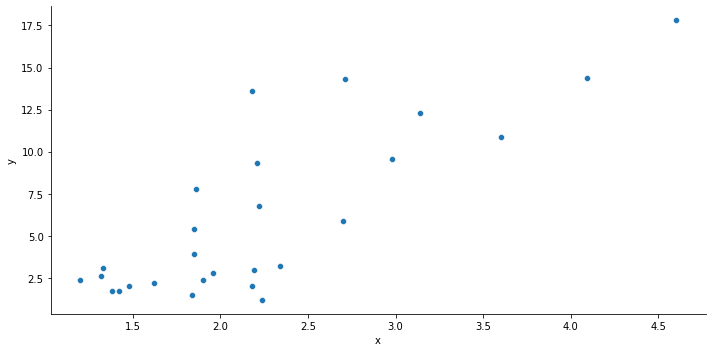

In [18]:
sns.relplot(data=df,x='x', y='y', aspect =2)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


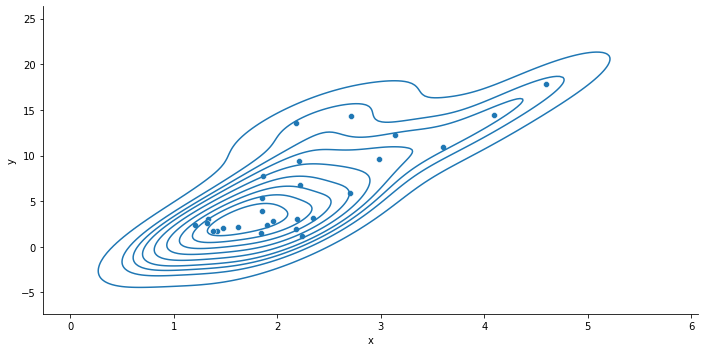

In [20]:
sns.relplot(data=df,x='x', y='y', aspect =2)
sns.kdeplot(df['x'], df['y'])

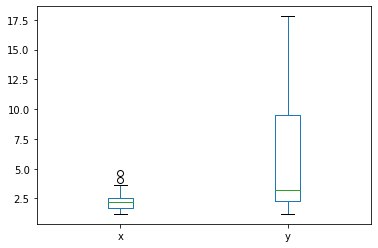

In [21]:
df.plot(kind='box')

Calculate the slope of the line

In [22]:
cov = df.cov()
cov

,x,y
x,0.714815,3.390746
y,3.390746,24.310415


In [30]:
b = 3.390746 / 0.714815
b

4.743529444681491

In [25]:
b = cov['x']['y']/ cov['x']['x']
b

4.743527107590986

Calculate the intercept a:

a = mean(y) - b*mean(x)

In [29]:
a = df['y'].mean() - 4.743527107590986*df['x'].mean()
print(" Intercept of the line =", a)

 Intercept of the line = -4.539688963978507


In [56]:
def model_equation(x):
  y_hat = a + b*x
  return y_hat

In [59]:
pred = model_equation(df['x'])
pred

0      2.196123
1      4.283276
2      2.480735
3     10.354993
4      5.943511
5      4.757629
6      1.152546
7      4.473017
8     14.861346
9      9.596029
10     5.848641
11     4.188405
12     5.801205
13     1.769205
14     5.801205
15     5.990946
16     6.085817
17     3.144829
18     1.721770
19     4.235841
20     4.235841
21     8.267841
22    12.537017
23    17.280546
24     2.006382
25     6.560170
26     8.315276
Name: x, dtype: float64

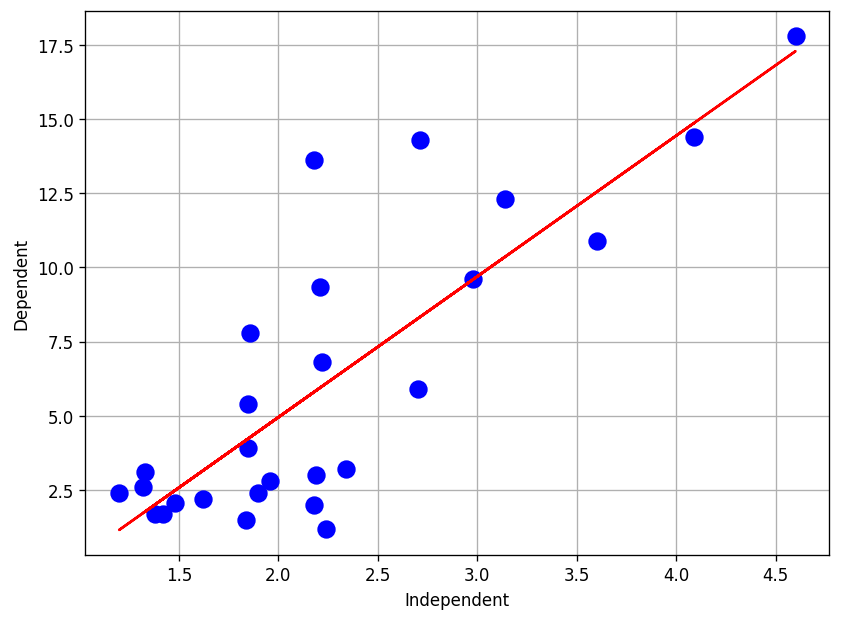

In [60]:
plt.figure(figsize =(8,6),dpi=120)
plt.plot(df['x'],df['y'],'bo',markersize=10)
plt.plot(df['x'],pred,'r')
plt.xlabel('Independent')
plt.ylabel('Dependent')
plt.grid()
plt.show()

In [33]:
import sklearn


In [34]:
from sklearn.linear_model import LinearRegression
sklearn.linear_model.LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
X = df.iloc[:,:-1].values

In [64]:
y = df.iloc[:,-1].values

In [65]:
model = LinearRegression().fit(X, y) 

In [46]:
# Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

# Print the Intercept:
print('intercept:', model.intercept_)

# Print the Slope:
print('slope:', model.coef_) 

# Predict a Response and print it:
y_pred = model.predict(X)
print('Predicted response:', y_pred, sep='\n')

coefficient of determination: 0.6616133883877515
intercept: -4.539688963978512
slope: [4.74352711]
Predicted response:
[ 2.19611953  4.28327146  2.48073116 10.35498615  5.94350594  4.75762417
  1.15254357  4.47301254 14.86133691  9.59602182  5.8486354   4.18840091
  5.80120013  1.76920209  5.80120013  5.99094121  6.08581176  3.14482495
  1.72176682  4.23583619  4.23583619  8.26783423 12.53700862 17.28053573
  2.00637844  6.56016447  8.3152695 ]


In [48]:
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
r2_score(y,y_pred)

0.6616133883877515

r2_score is Coefficient of determination, to evaluate the performance of a linear regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable.
Here,66% of the data fit the regression model

In [50]:
mean_squared_error(y_pred,y)

7.921640604112712

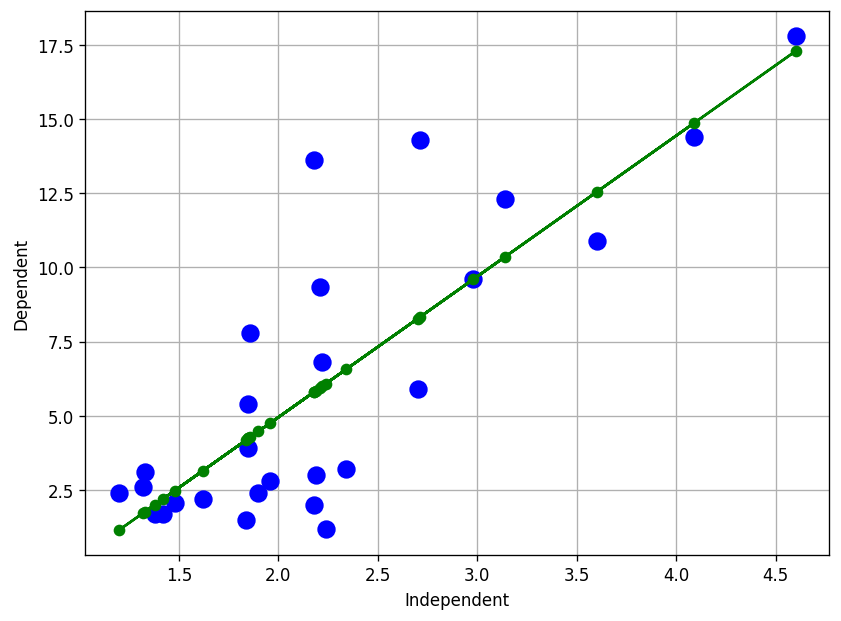

In [66]:
plt.figure(figsize =(8,6),dpi=120)
plt.plot(df['x'],df['y'],'bo',markersize=10)
plt.plot(df['x'],y_pred,'g')
plt.plot(df['x'],y_pred,'go')
plt.xlabel('Independent')
plt.ylabel('Dependent')
plt.grid()
plt.show()

In [70]:
test = np.array([2]).reshape(-1,1)
model.predict(test)

array([4.94736525])